# Capstone Project


Dataset: Penguins

In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import ast, json

from datetime import datetime
import matplotlib.pyplot as plt
from sklearn import preprocessing


%matplotlib inline


Data Pre-processing

In [148]:
# load data into dataframe
penguins_size = pd.read_csv('penguins_size.csv')
penguins_size

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


Removing any missing values

In [149]:
# view if the data has any missing fields
pd.isnull(penguins_size).sum()


species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [150]:
# drop data that has missing values in select columns
penguins_size = penguins_size.dropna(subset=['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g'], how='all')
pd.isnull(penguins_size).sum()


species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  8
dtype: int64

In [151]:
# sex has a number of missing fields still
penguins_size['sex'].unique()

array(['MALE', 'FEMALE', nan, '.'], dtype=object)

In [152]:
# upon closer investigation, a '.' is a field, so we replace with np.nan
penguins_size['sex'].replace('.', np.nan, inplace=True)

C:\Users\tayyi\AppData\Local\Temp\ipykernel_72900\3783955774.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  penguins_size['sex'].replace('.', np.nan, inplace=True)


In [153]:
# we should have three unique fields including nan
penguins_size['sex'].unique()

array(['MALE', 'FEMALE', nan], dtype=object)

In [154]:
# drop nan fields and count the number of missing fields
penguins_size = penguins_size.dropna(subset=['sex'], how='any')
pd.isnull(penguins_size).sum()


species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

Checking for duplicates and further checks

In [67]:
# check for duplicates
penguins_size[penguins_size.duplicated(subset=['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g'], keep=False)]


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex


In [155]:
# view all data types for each column and count the number of non-null values per column
penguins_size.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   culmen_length_mm   333 non-null    float64
 3   culmen_depth_mm    333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


Data Visualisation

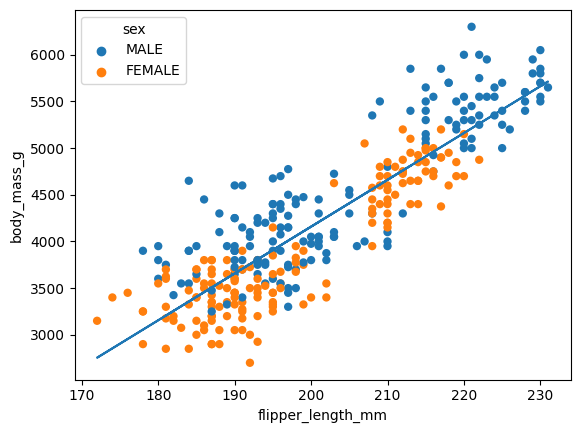

In [178]:
x = penguins_size['flipper_length_mm']
y = penguins_size['body_mass_g']

sns.scatterplot(x=x, y=y, data=penguins_size, hue='sex', ec=None)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x))


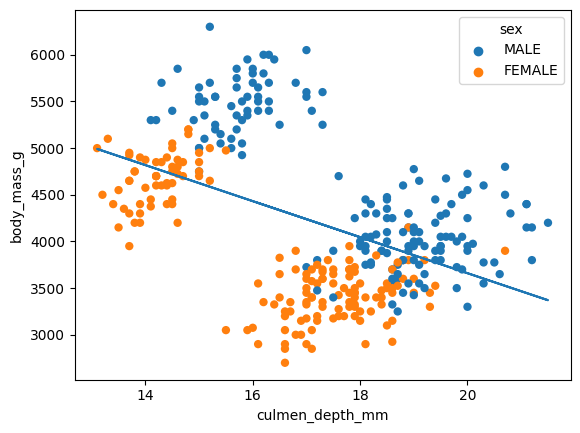

In [176]:
x = penguins_size['culmen_depth_mm']
y = penguins_size['body_mass_g']

sns.scatterplot(x=x, y=y, data=penguins_size, hue='sex', ec=None)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x))


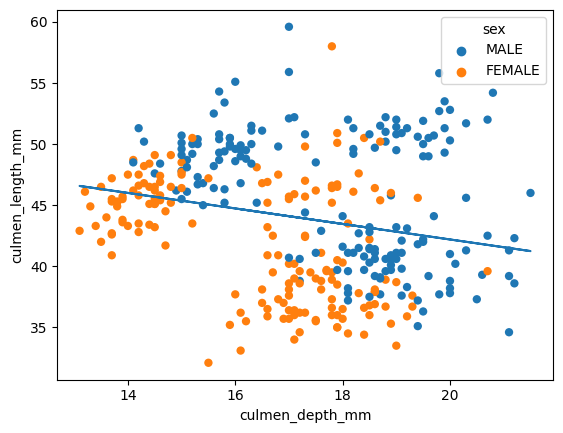

In [175]:
x = penguins_size['culmen_depth_mm']
y = penguins_size['culmen_length_mm']

sns.scatterplot(x=x, y=y, data=penguins_size, hue='sex', ec=None)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x))


In [116]:
# identifying unique species in the dataframe
penguins_size['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [159]:
# identifying unique islands in the dataframe
penguins_size['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

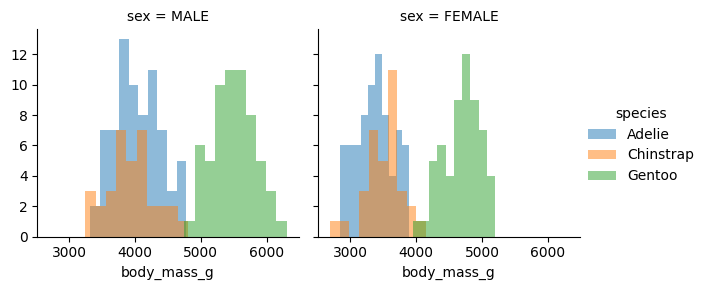

In [130]:
# I want to visualise the rough concentration of species based on sex and species focusing on body mass
g = sns.FacetGrid(penguins_size, col="sex", hue="species")
g.map(plt.hist, "body_mass_g", alpha=0.5)
g.add_legend()

Graph above shows that Adelie and Chinstrap (both male and female for both species) are generally both lighter than Gentoo Penguins (both male and female)

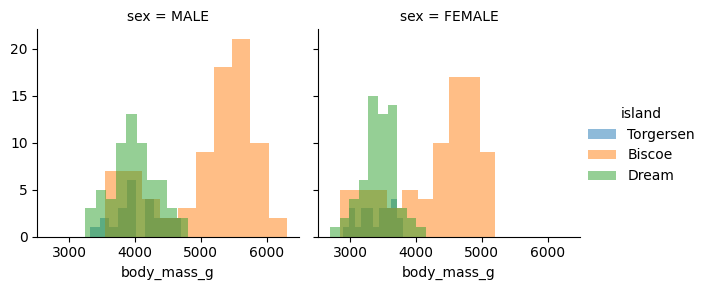

In [129]:
# looking into island now
g = sns.FacetGrid(penguins_size, col="sex", hue="island")
g.map(plt.hist, "body_mass_g", alpha=0.5)
g.add_legend()

Looking at the frequency based on sex and island, generally penguins coming from Biscoe are typically heavier than those from Torgesen and Dream. 

Merging and grouping for further analysis

In [160]:
penguins_size_species = penguins_size.groupby(by=['species', 'island', 'sex'])
penguins_size_species = round(penguins_size_species.mean(),0)
penguins_size_species = penguins_size_species.reset_index()
penguins_size_species



,species,island,sex,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,Biscoe,FEMALE,37.0,18.0,187.0,3369.0
1,Adelie,Biscoe,MALE,41.0,19.0,190.0,4050.0
2,Adelie,Dream,FEMALE,37.0,18.0,188.0,3344.0
3,Adelie,Dream,MALE,40.0,19.0,192.0,4046.0
4,Adelie,Torgersen,FEMALE,38.0,18.0,188.0,3396.0
5,Adelie,Torgersen,MALE,41.0,19.0,195.0,4035.0
6,Chinstrap,Dream,FEMALE,47.0,18.0,192.0,3527.0
7,Chinstrap,Dream,MALE,51.0,19.0,200.0,3939.0
8,Gentoo,Biscoe,FEMALE,46.0,14.0,213.0,4680.0
9,Gentoo,Biscoe,MALE,49.0,16.0,222.0,5485.0


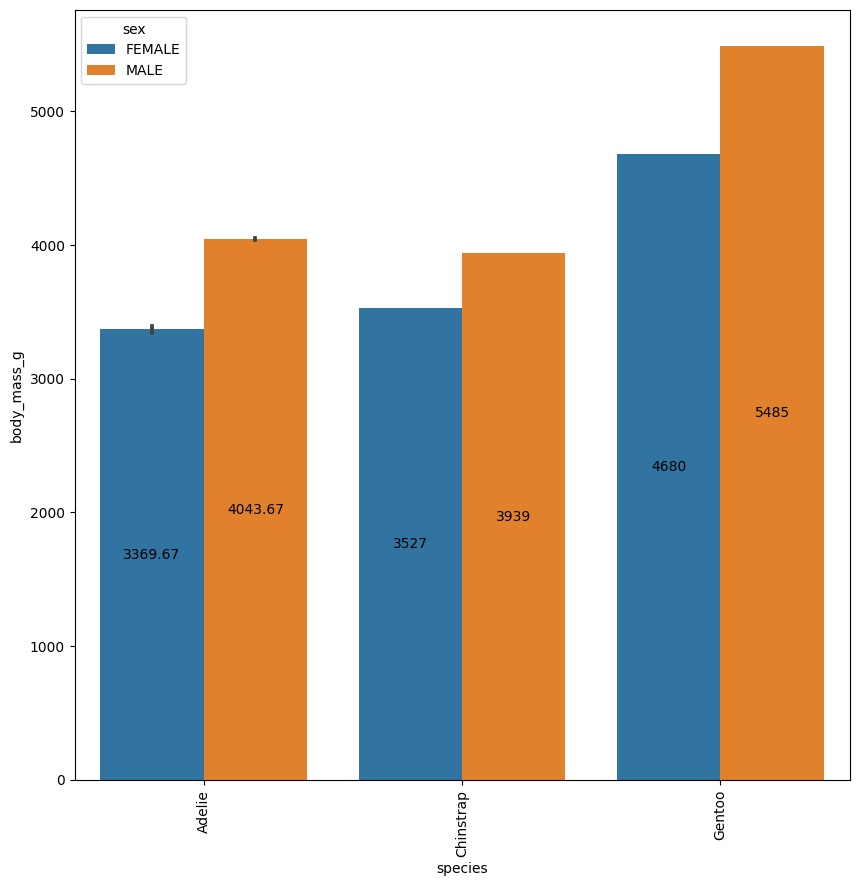

In [121]:
ax = sns.barplot(data = penguins_size_species, x = 'species', hue = 'sex', y = 'body_mass_g')

plt.xticks(rotation=90)
ax.figure.set_size_inches(10, 10)

for container in ax.containers:
    ax.bar_label(container, label_type = 'center')

Gentoo Penguins are heavier on average compared to Adelie and Chinstrap, confirming the histogram from earlier

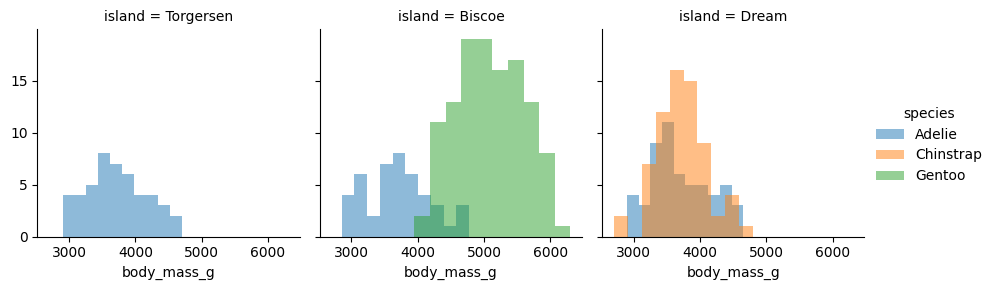

In [162]:
g = sns.FacetGrid(penguins_size, col="island", hue="species")
g.map(plt.hist, "body_mass_g", alpha=0.5)
g.add_legend()

Looking at the histogram above, Gentoo penguins can only be found in Biscoe. Chinstrap Penguins are native to Dream Island and Adelie penguins can be found in all three islands. 

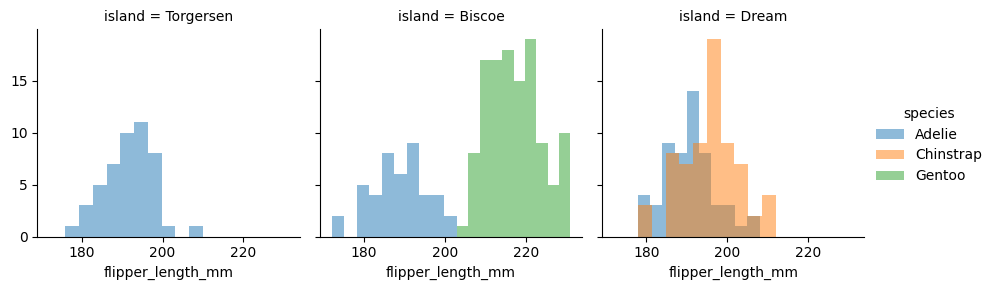

In [163]:
g = sns.FacetGrid(penguins_size, col="island", hue="species")
g.map(plt.hist, "flipper_length_mm", alpha=0.5)
g.add_legend()

Based on the above, the Gentoo penguins also appear to have larger flipper lengths compared to other penguins. This may suggest that Gentoo penguins may be the largest of the three species

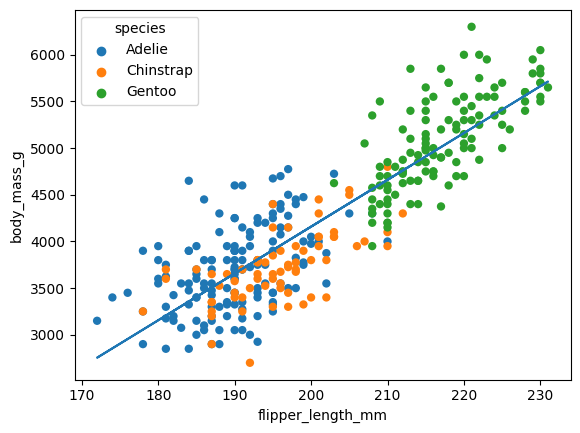

In [179]:
x = penguins_size['flipper_length_mm']
y = penguins_size['body_mass_g']

sns.scatterplot(x=x, y=y, data=penguins_size, hue='species', ec=None)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x))


When comparing the flipper length and body mass, the clustering behaviour is observed from the lense of the penguin species. 

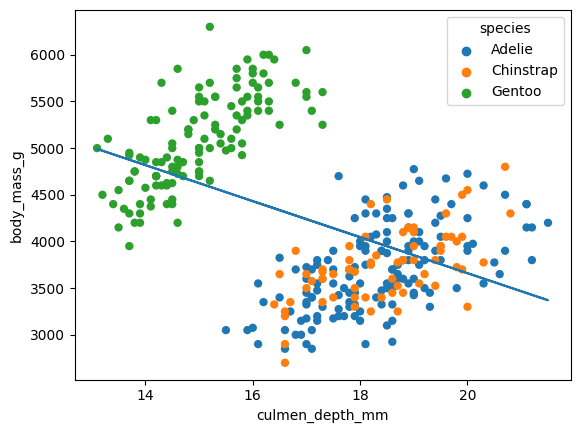

In [184]:
x = penguins_size['culmen_depth_mm']
y = penguins_size['body_mass_g']

sns.scatterplot(x=x, y=y, data=penguins_size, hue='species', ec=None)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x))


Again this clustering is observed when comparing body mass against culmen depth

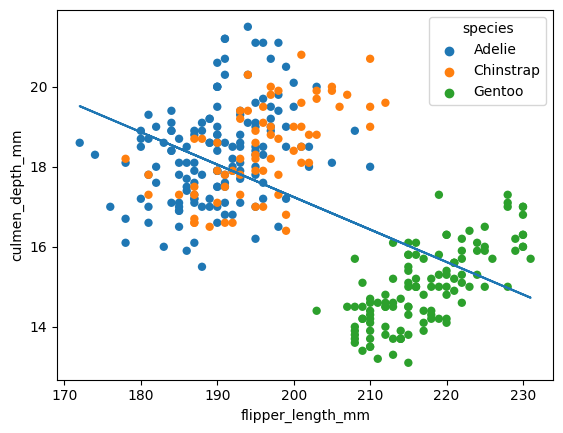

In [183]:
x = penguins_size['flipper_length_mm']
y = penguins_size['culmen_depth_mm']

sns.scatterplot(x=x, y=y, data=penguins_size, hue='species', ec=None)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x))


And when comparing flipper length against culmen depth which may highlight that Adelie and Chinstrap may be more closely related to each other than they are to Gentoo penguins